# Stochastic Gradient Descent 

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Dataset

The function 

$$ z(x,y) = \exp (a_1(x-b_1)^2 + a_1(y-b_1)^2) + \exp (a_2(x-b_2)^2 + a_2(y-b_2)^2) $$

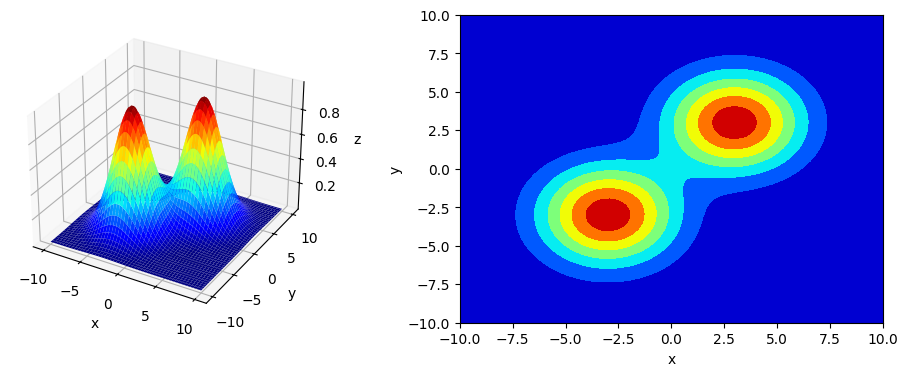

In [71]:
# import for colormaps
from matplotlib import cm

x=np.linspace(-10,10, num=100)
y=np.linspace(-10,10, num=100)

x, y = np.meshgrid(x, y)

a_1 = -0.1 
a_2 = -0.1
b_1 = 3
b_2 = -3  

z_1 = np.exp(a_1*(x-b_1)**2 + a_1*(y-b_1)**2)
z_2 = np.exp(a_1*(x-b_2)**2 + a_2*(y-b_2)**2)

z = z_1 + z_2

# Plotting
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x,y, z, cmap=cm.jet)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax2 = fig.add_subplot(122)
ax2.contourf(x,y,z, cmap = cm.jet)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.show()

## Algorithm

Gradient Descent 

$$ [x_n, y_n] = [x_{n-1}, y_{n-1}] + \lambda \cdot  \nabla z(x_{n-1},y_{n-1})$$

Where 

$$\frac{\partial z}{\partial x} = exp(\dots) \cdot 2a_1(x-b_1) + exp(\dots) \cdot 2a_2(x-b_2)$$ 
$$\frac{\partial z}{\partial y} = exp(\dots) \cdot 2a_1(y-b_1) + exp(\dots) \cdot 2a_2(y-b_2)$$ 

And $\nabla z(x,y) = [\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}]$

In [77]:
def gradient_descent(prev_x, prev_y, learning_rate):

    gradient_x_left = np.exp(a_1*(prev_x - b_1)**2 + a_1*(prev_y - b_1)**2) * 2*a_1*(prev_x - b_1)
    gradient_x_right = np.exp(a_2*(prev_x - b_2)**2 + a_2*(prev_y - b_2)**2) * 2*a_2*(prev_x - b_2)

    gradient_x = gradient_x_left + gradient_x_right

    gradient_y_left = np.exp(a_1*(prev_x - b_1)**2 + a_1*(prev_y - b_1)**2) * 2*a_1*(prev_y - b_1)
    gradient_y_right = np.exp(a_2*(prev_x - b_2)**2 + a_2*(prev_y - b_2)**2) * 2*a_2*(prev_y - b_2)

    gradient_y = gradient_y_left + gradient_y_right

    new_x = prev_x + learning_rate*gradient_x
    new_y = prev_y + learning_rate*gradient_y 

    return new_x, new_y 
    

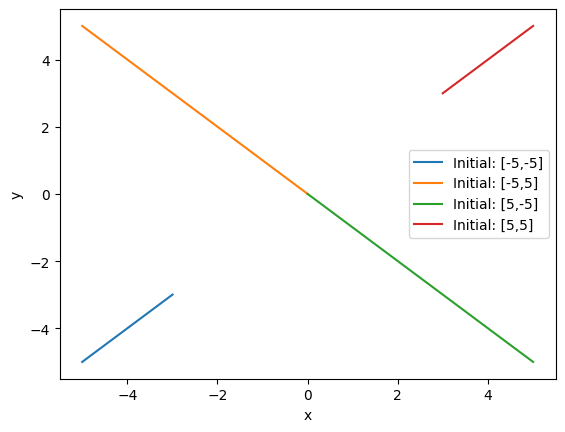

In [93]:
next_x, next_y = [-10, -10]


def iterate_over_initial_conditions(initial_x, initial_y, steps = 10000, learning_rate = 1):

    next_x, next_y = initial_x, initial_y
    x_list = [next_x]
    y_list = [next_y]

    for _ in range(steps):
        next_x, next_y = gradient_descent(next_x, next_y, learning_rate = 1)
        x_list.append(next_x)
        y_list.append(next_y)
        
    return x_list, y_list

initial_x = -5
initial_y = -5
x_list, y_list = iterate_over_initial_conditions(initial_x, initial_y)
plt.plot(x_list, y_list, label = f'Initial: [{initial_x},{initial_y}]')
initial_x = -5
initial_y = 5
x_list, y_list = iterate_over_initial_conditions(initial_x, initial_y)
plt.plot(x_list, y_list, label = f'Initial: [{initial_x},{initial_y}]')
initial_x = 5
initial_y = -5
x_list, y_list = iterate_over_initial_conditions(initial_x, initial_y)
plt.plot(x_list, y_list, label = f'Initial: [{initial_x},{initial_y}]')
initial_x = 5 
initial_y = 5
x_list, y_list = iterate_over_initial_conditions(initial_x, initial_y)
plt.plot(x_list, y_list, label = f'Initial: [{initial_x},{initial_y}]')


plt.xlabel("x")
plt.ylabel("y")
plt.legend()